In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
d = pd.read_csv('winequality-red.csv')


In [3]:
d.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
d.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
d.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
quality = d["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

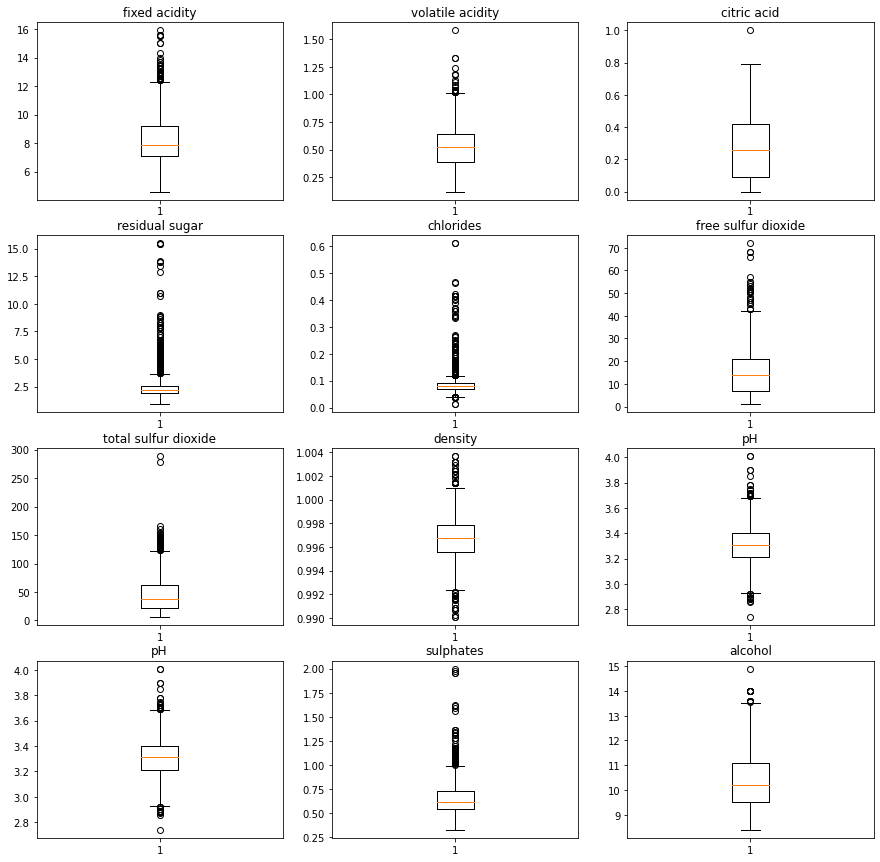

In [8]:
figure, axis = plt.subplots(4, 3,figsize=(15,15))
axis[0, 0].boxplot(d['fixed acidity'])
axis[0, 0].set_title('fixed acidity')
axis[0, 1].boxplot(d['volatile acidity'])
axis[0, 1].set_title('volatile acidity')
axis[0, 2].boxplot(d['citric acid'])
axis[0, 2].set_title('citric acid')
axis[1, 0].boxplot(d['residual sugar'])
axis[1, 0].set_title('residual sugar')
axis[1, 1].boxplot(d['chlorides'])
axis[1, 1].set_title('chlorides')
axis[1, 2].boxplot(d['free sulfur dioxide'])
axis[1, 2].set_title('free sulfur dioxide')
axis[2, 0].boxplot(d['total sulfur dioxide'])
axis[2, 0].set_title('total sulfur dioxide')
axis[2, 1].boxplot(d['density'])
axis[2, 1].set_title('density')
axis[2, 2].boxplot(d['pH'])
axis[2, 2].set_title('pH')
axis[3, 0].boxplot(d['pH'])
axis[3, 0].set_title('pH')
axis[3, 1].boxplot(d['sulphates'])
axis[3, 1].set_title('sulphates')
axis[3, 2].boxplot(d['alcohol'])
axis[3, 2].set_title('alcohol')
plt.show()


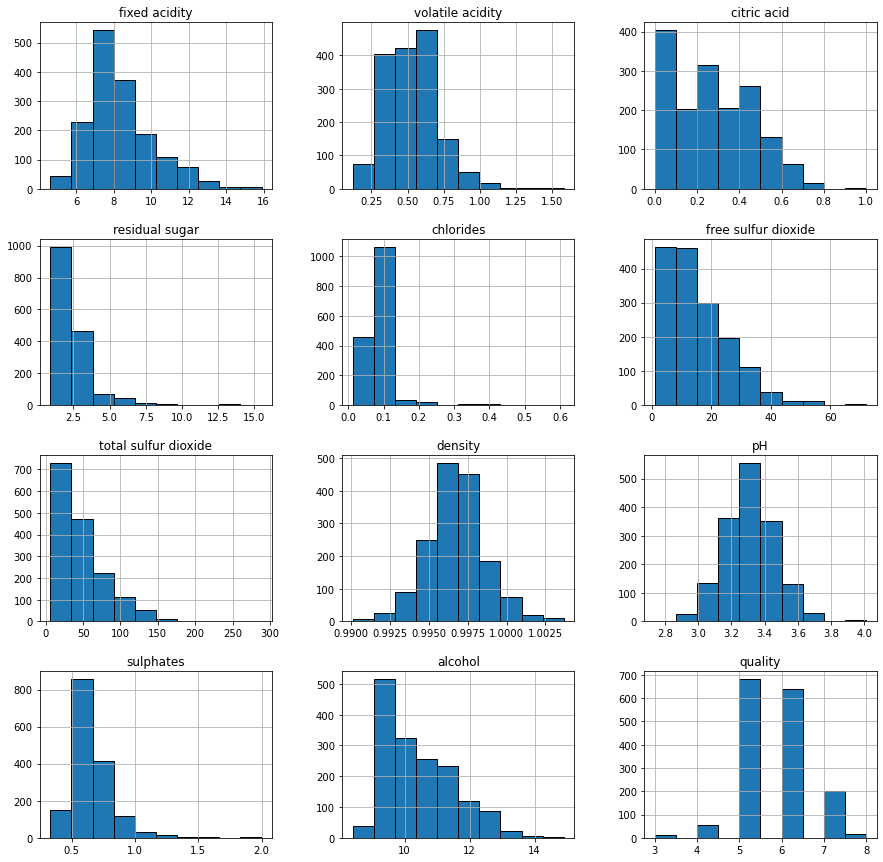

In [9]:
d.hist(edgecolor='black',figsize=(15,15))
plt.show()

In [11]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([d,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)


Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

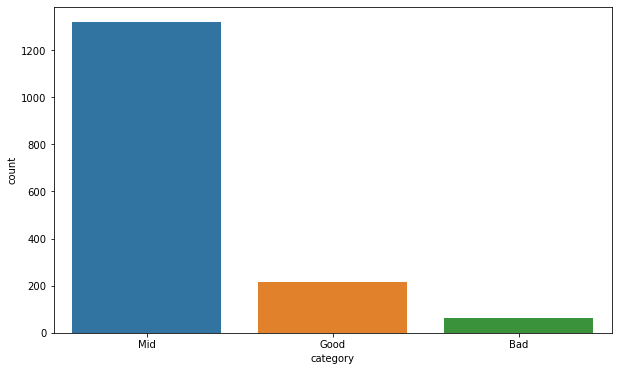

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"])
data["category"].value_counts()

In [13]:
d.corr().style.background_gradient(cmap='Blues')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [14]:
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)


In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_svc))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.64      0.30      0.41        30
           2       0.89      0.98      0.93       277

    accuracy                           0.88       320
   macro avg       0.51      0.43      0.45       320
weighted avg       0.83      0.88      0.85       320



In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.60      0.60      0.60        30
           2       0.91      0.96      0.93       277

    accuracy                           0.88       320
   macro avg       0.50      0.52      0.51       320
weighted avg       0.85      0.88      0.87       320



In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.55      0.57      0.56        30
           2       0.91      0.95      0.93       277

    accuracy                           0.88       320
   macro avg       0.49      0.51      0.50       320
weighted avg       0.84      0.88      0.86       320



In [22]:
conclusion = pd.DataFrame({'models': ["SVC","Random Forest","KNN"],
                           'accuracies': [accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_knn)]})
conclusion

,models,accuracies
0,SVC,0.878125
1,Random Forest,0.884375
2,KNN,0.875000
